In [45]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import matplotlib.pyplot as plt
import imutils

In [9]:
def load_data(dir_path):
    X = []
    for file in tqdm((os.listdir(dir_path))):
        if not file.startswith('.'):
            img = cv2.imread(dir_path + '/' + file)
            X.append(img)
    X = np.array(X)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X

In [10]:
X = load_data('all')

100%|██████████| 240/240 [00:00<00:00, 320.36it/s]

240 images loaded from all directory.


In [49]:
def plot_samples(X, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    np.random.shuffle(X)
    imgs = X[:n]
    j = 10
    i = int(n/j)

    plt.figure(figsize=(15,6))
    c = 1
    for img in imgs:
        plt.subplot(i,j,c)
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        c += 1
    plt.show()

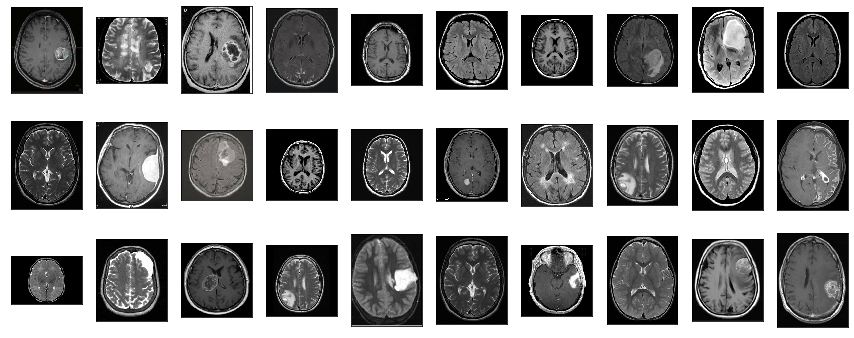

In [51]:
plot_samples(X, n=30)

In [40]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

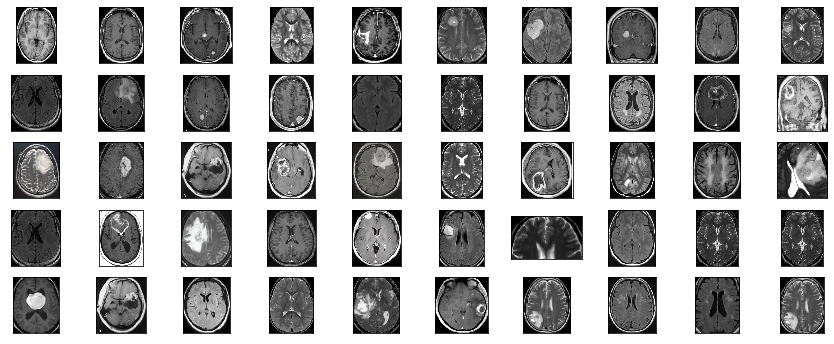

In [54]:
X_crop = crop_imgs(X, add_pixels_value=0)
plot_samples(X_crop, n=50)

In [57]:
IMG_SIZE = 256
X_crop_resized = []
for img in X_crop:
    img_new = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X_crop_resized.append(img_new)
X_crop_resized = np.array(X_crop_resized)

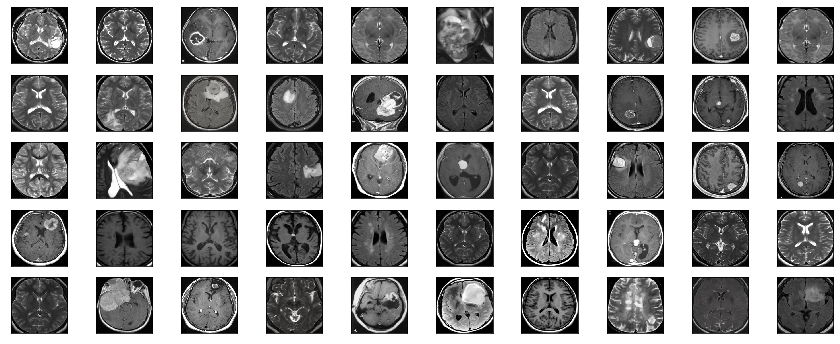

In [59]:
plot_samples(X_crop_resized, n=50)

In [63]:
X_crop_resized_unique = np.unique(X_crop_resized, axis=0)

In [64]:
def save_new_images(X, dir_name):
    for (i,img) in enumerate(X):
        cv2.imwrite(dir_name+'/'+str(i)+'.jpg', img)

In [65]:
!mkdir all_cleaned

In [66]:
save_new_images(X_crop_resized_unique, 'all_cleaned/')